Your goal is to train a regression model using this dataset and evaluate its performance by answering those two questions:


Q.1 [Code submission required] Apply your knowledge of Machine Learning to predict the price of Kimchi.

Q.2 [No code] Briefly explain the results.



The code was written following these steps:
1. Data Analysis
2. Data Preprocessing
3. Model Training
4. Model Selection
5. Model Evaluation
6. Modal Visualization
7. Results


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_excel("./sample_data/Kimchi dataset - Hometest.xlsx")

# 1. Data Analysis
- Check non-null count
  - 4 Price, 1 Total Volume data missing
- Check if data is sorted in date
  - Unsorted
- Check outliers
  - Outliers exist
- Check feature scales
  - Feature scaling seems nescessary

In [3]:
# Check non-null count
# Check if data is sorted in date
print(dataset.info())
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          648 non-null    datetime64[ns]
 1   Price         644 non-null    float64       
 2   Total Volume  647 non-null    float64       
 3   Total Boxes   648 non-null    float64       
 4   Small Boxes   648 non-null    float64       
 5   Large Boxes   648 non-null    float64       
 6   XLarge Boxes  648 non-null    float64       
 7   Region        648 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 40.6+ KB
None
        Date  Price  Total Volume  Total Boxes  Small Boxes  Large Boxes  \
0 2018-03-25   1.71       2321.82      2006.46      1996.46        10.00   
1 2018-03-18   1.66       3154.45      2580.60      2577.27         3.33   
2 2018-03-11   1.68       2570.52      2209.29      2209.29         0.00   
3 2018-03-04   

In [4]:
# Check outliers
y = dataset['Price']
print(y.min(), y.max(), y.mean(), y.median())

1.01 3003.0 6.533540372670808 1.55


# 2. Data Preprocessing
- Sort data by date
- Fill missing data
- Filter outliers
- Scale feature data
- Split data into train and test dataset

In [5]:
# Sort data by date
dataset = dataset.sort_values(by='Date')

In [6]:
print(dataset.head())
print(dataset.tail())

          Date  Price  Total Volume  Total Boxes  Small Boxes  Large Boxes  \
323 2018-01-07   1.57       7700.96      5275.21      3330.37      1944.84   
335 2018-01-07   1.43       6860.00      6576.30      6528.88        47.42   
311 2018-01-07   1.22     283583.37    232258.64    223671.12      8587.52   
299 2018-01-07   1.47       7496.04      7149.33      7135.99        13.34   
287 2018-01-07   1.38       4622.45      3410.99      2226.12      1184.87   

     XLarge Boxes      Region  
323           0.0     Taebaek  
335           0.0  Pyeongtaek  
311           0.0     Taebaek  
299           0.0       Suwon  
287           0.0      Jeonju  
          Date  Price  Total Volume  Total Boxes  Small Boxes  Large Boxes  \
360 2018-03-25   1.63      22596.13     22329.02     22329.02         0.00   
24  2018-03-25   1.33      57606.42     49973.16     49957.61        15.55   
336 2018-03-25   1.86     118503.55     70508.16     70377.52       130.64   
312 2018-03-25   1.48      

In [7]:
# Fill missing data by median
dataset.loc[dataset['Price'] != dataset['Price'], 'Price'] = dataset['Price'].median()
dataset.loc[dataset['Total Volume'] != dataset['Total Volume'], 'Total Volume'] = dataset['Total Volume'].median()

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 323 to 0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          648 non-null    datetime64[ns]
 1   Price         648 non-null    float64       
 2   Total Volume  648 non-null    float64       
 3   Total Boxes   648 non-null    float64       
 4   Small Boxes   648 non-null    float64       
 5   Large Boxes   648 non-null    float64       
 6   XLarge Boxes  648 non-null    float64       
 7   Region        648 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 45.6+ KB


In [9]:
# Calculating outliers boundary
y = dataset['Price']
Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering outliers (8 outliers filtered)
mask = (y >= lower_bound) & (y <= upper_bound)
dataset_filtered = dataset[mask]
X_filtered, y_filtered = dataset_filtered.loc[:,dataset_filtered.columns !='Price'], dataset_filtered['Price'].to_frame()

In [10]:
type(y_filtered)
print(y_filtered.shape, y_filtered.shape)

(640, 1) (640, 1)


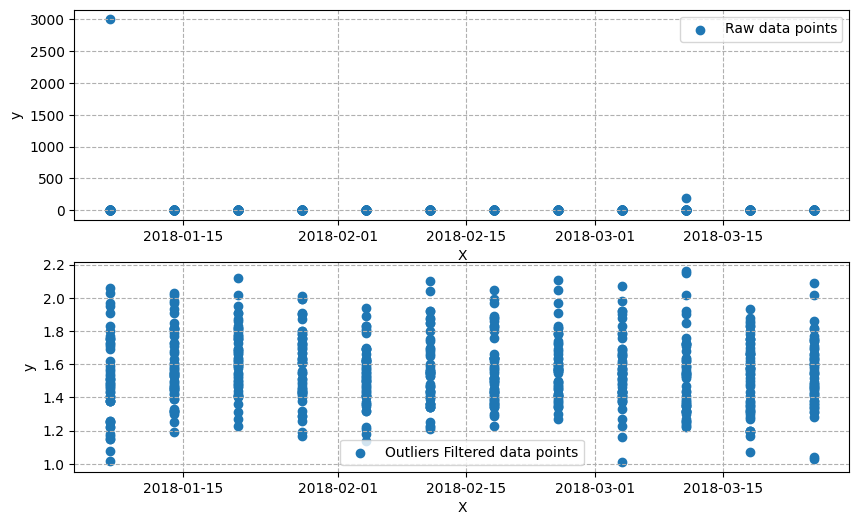

In [11]:
# Data Visualization
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.scatter(dataset['Date'], dataset['Price'], label="Raw data points")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True, linestyle='--')
plt.legend()
plt.subplot(212)
plt.scatter(dataset_filtered['Date'], dataset_filtered['Price'], label="Outliers Filtered data points")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

In [12]:
X_filtered["Month"] = X_filtered["Date"].dt.month
X_filtered["Day"] = X_filtered["Date"].dt.day

In [13]:
X_filtered['Region'] = X_filtered['Region'].astype('category').cat.codes

In [14]:
X_filtered = X_filtered.loc[:,(X_filtered.columns !='Date')]

In [15]:
X_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 323 to 0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  640 non-null    float64
 1   Total Boxes   640 non-null    float64
 2   Small Boxes   640 non-null    float64
 3   Large Boxes   640 non-null    float64
 4   XLarge Boxes  640 non-null    float64
 5   Region        640 non-null    int8   
 6   Month         640 non-null    int64  
 7   Day           640 non-null    int64  
dtypes: float64(5), int64(2), int8(1)
memory usage: 40.6 KB


In [16]:
def boxplot_vis(data, target_name):
    plt.figure(figsize=(30, 30))
    for col_idx in range(len(data.columns)):
        plt.subplot(6, 2, col_idx+1)
        # flierprops: outliers in red diamond
        plt.boxplot(data[data.columns[col_idx]], flierprops = dict(markerfacecolor = 'r', marker = 'D'))
        plt.title("Feature" + "(" + target_name + "):" + data.columns[col_idx], fontsize = 20)
    plt.show()

In [17]:
X_filtered

,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes,Region,Month,Day
323,7700.96,5275.21,3330.37,1944.84,0.0,33,1,7
335,6860.00,6576.30,6528.88,47.42,0.0,27,1,7
311,283583.37,232258.64,223671.12,8587.52,0.0,33,1,7
299,7496.04,7149.33,7135.99,13.34,0.0,32,1,7
287,4622.45,3410.99,2226.12,1184.87,0.0,23,1,7
...,...,...,...,...,...,...,...,...
360,22596.13,22329.02,22329.02,0.00,0.0,28,3,25
24,57606.42,49973.16,49957.61,15.55,0.0,21,3,25
336,118503.55,70508.16,70377.52,130.64,0.0,39,3,25
312,7250.69,5447.45,4834.97,612.48,0.0,33,3,25


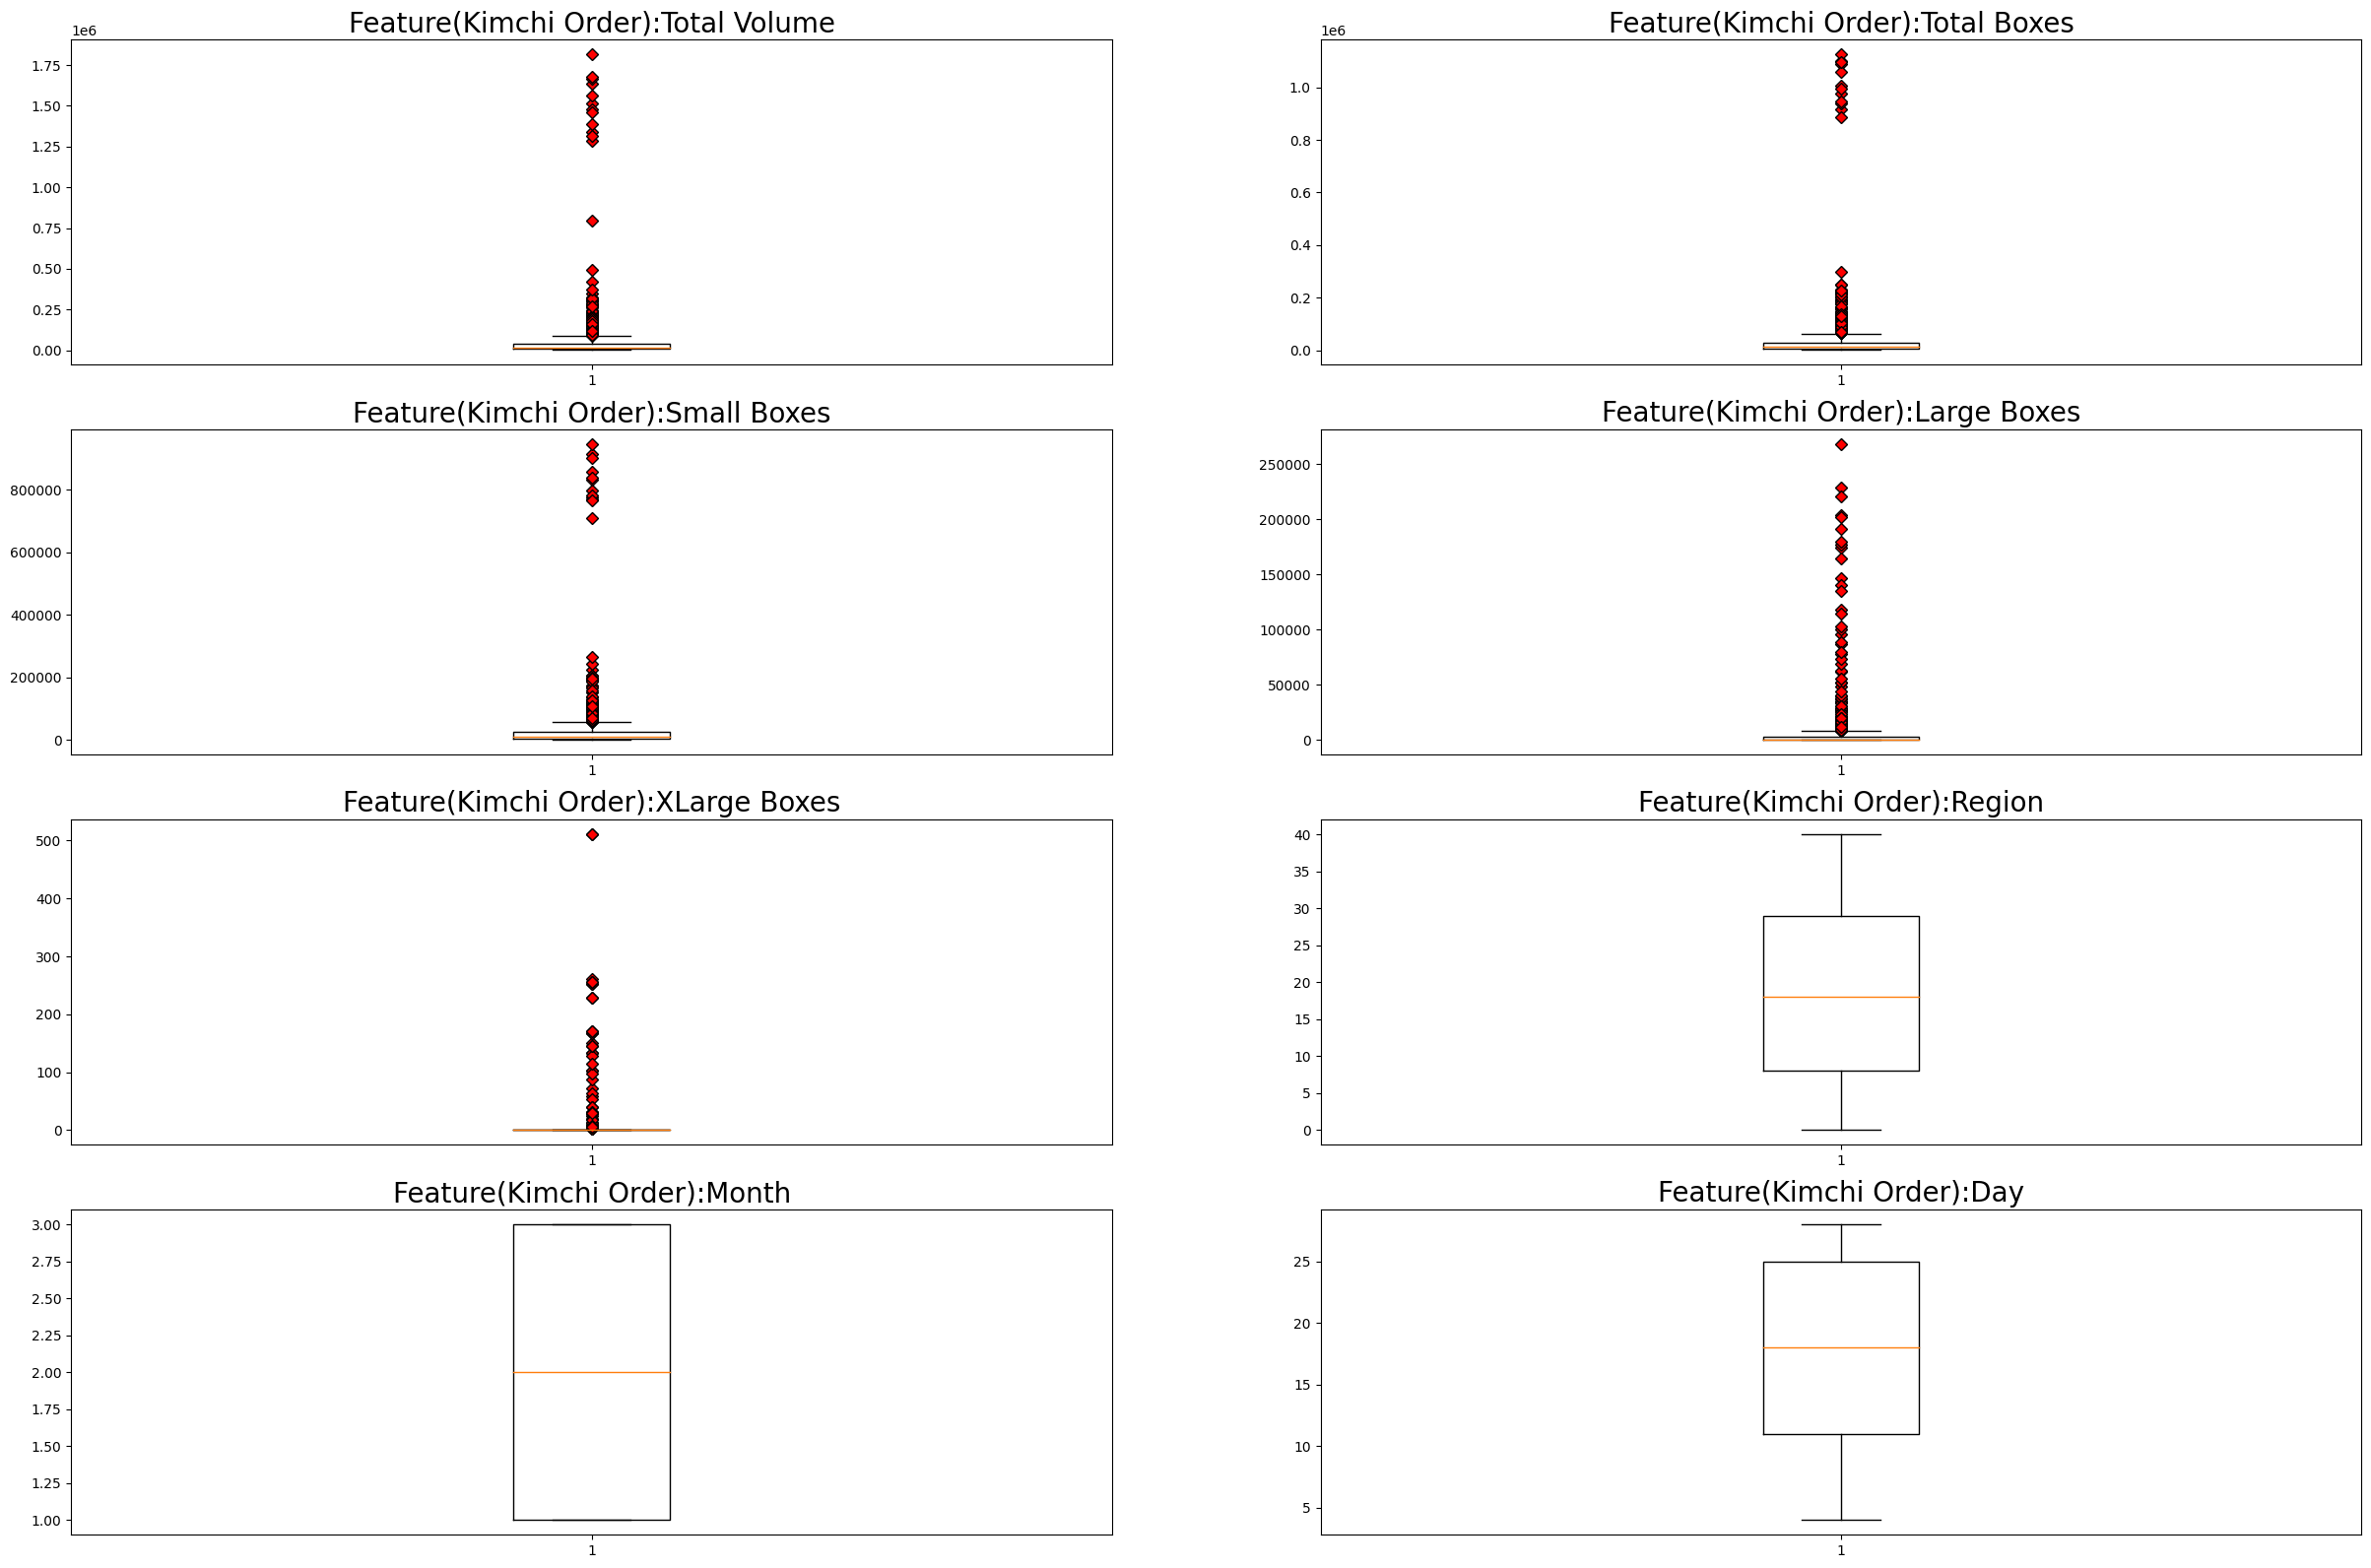

In [18]:
boxplot_vis(X_filtered, 'Kimchi Order')

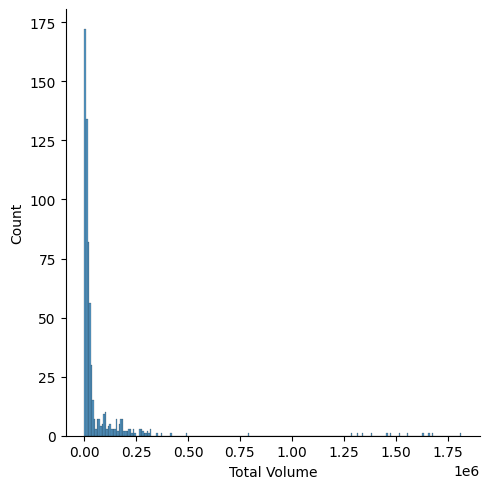

In [19]:
import seaborn as sns
sns.displot(X_filtered['Total Volume'])

In [20]:
def price_correlation_plot(data, target_name):
  plt.figure(figsize=(30, 30))
  for col_idx in range(len(data.columns)):
    plt.subplot(6, 2, col_idx+1)
    # flierprops: outliers in red diamond
    plt.scatter(data[data.columns[col_idx]], y_filtered, color='blue', label='Filtered Data')
    # plt.boxplot(data[data.columns[col_idx]], flierprops = dict(markerfacecolor = 'r', marker = 'D'))
    plt.title("Feature" + "(" + target_name + "):" + data.columns[col_idx], fontsize = 20)
  plt.show()


### **Volume** related features shows small variance and is highly biased to small values -> **log transformation** seems suitable

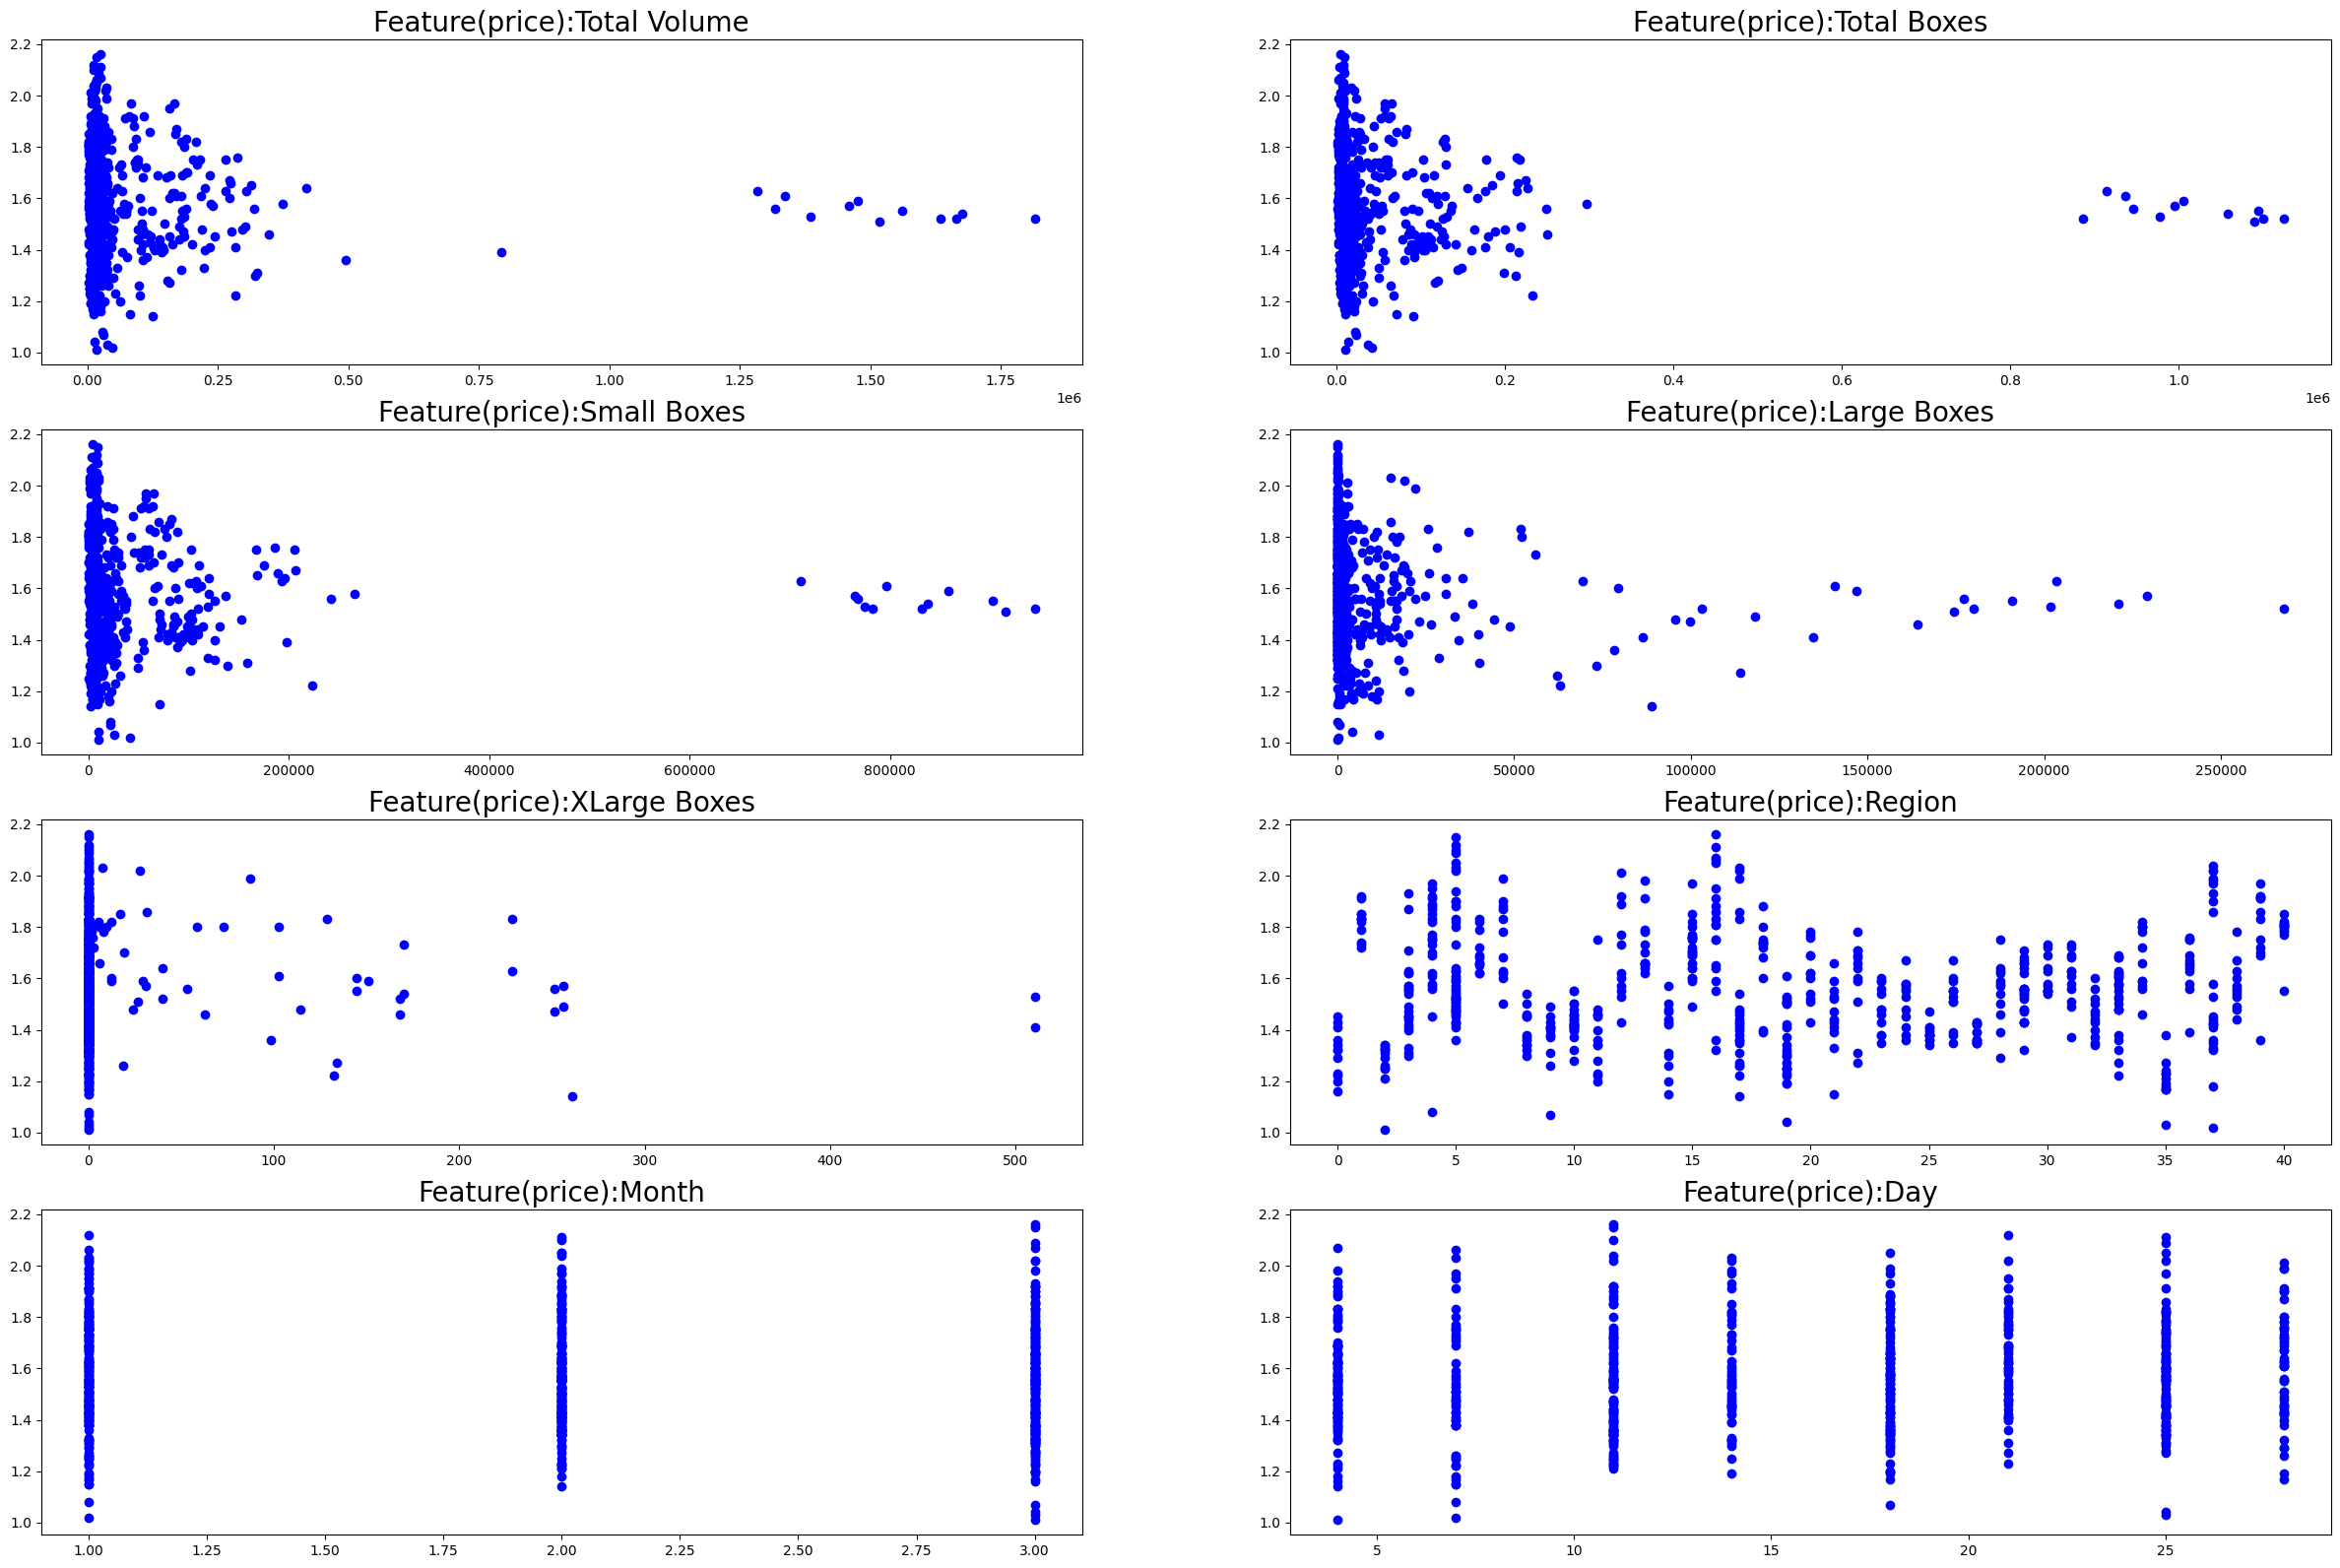

In [21]:
price_correlation_plot(X_filtered,"price")

Log Transformation

In [22]:
X_log_transformed = X_filtered[['Small Boxes','Large Boxes','Total Boxes','XLarge Boxes', 'Total Volume']].to_numpy()
for idx in range(len(X_log_transformed[0])):
  X_log_transformed[:, idx] = np.log1p(X_log_transformed[:, idx])

In [23]:
X_log_transformed_df = pd.DataFrame(X_log_transformed, index=X_filtered.index, columns=['Small Boxes','Large Boxes','Total Boxes','XLarge Boxes', 'Total Volume'])

In [24]:
X_log_transformed_df

,Small Boxes,Large Boxes,Total Boxes,XLarge Boxes,Total Volume
323,8.111139,7.573449,8.570963,0.0,8.949230
335,8.784144,3.879913,8.791380,0.0,8.833608
311,12.317937,9.058182,12.355611,0.0,12.555265
299,8.873046,2.663053,8.874914,0.0,8.922264
287,7.708465,7.078232,8.135051,0.0,8.438896
...,...,...,...,...,...
360,10.013687,0.000000,10.013687,0.0,10.025578
24,10.818950,2.806386,10.819261,0.0,10.961407
336,11.161643,4.880071,11.163498,0.0,11.682707
312,8.483837,6.419148,8.603086,0.0,8.888990


Scaled data seems nicely scattered!

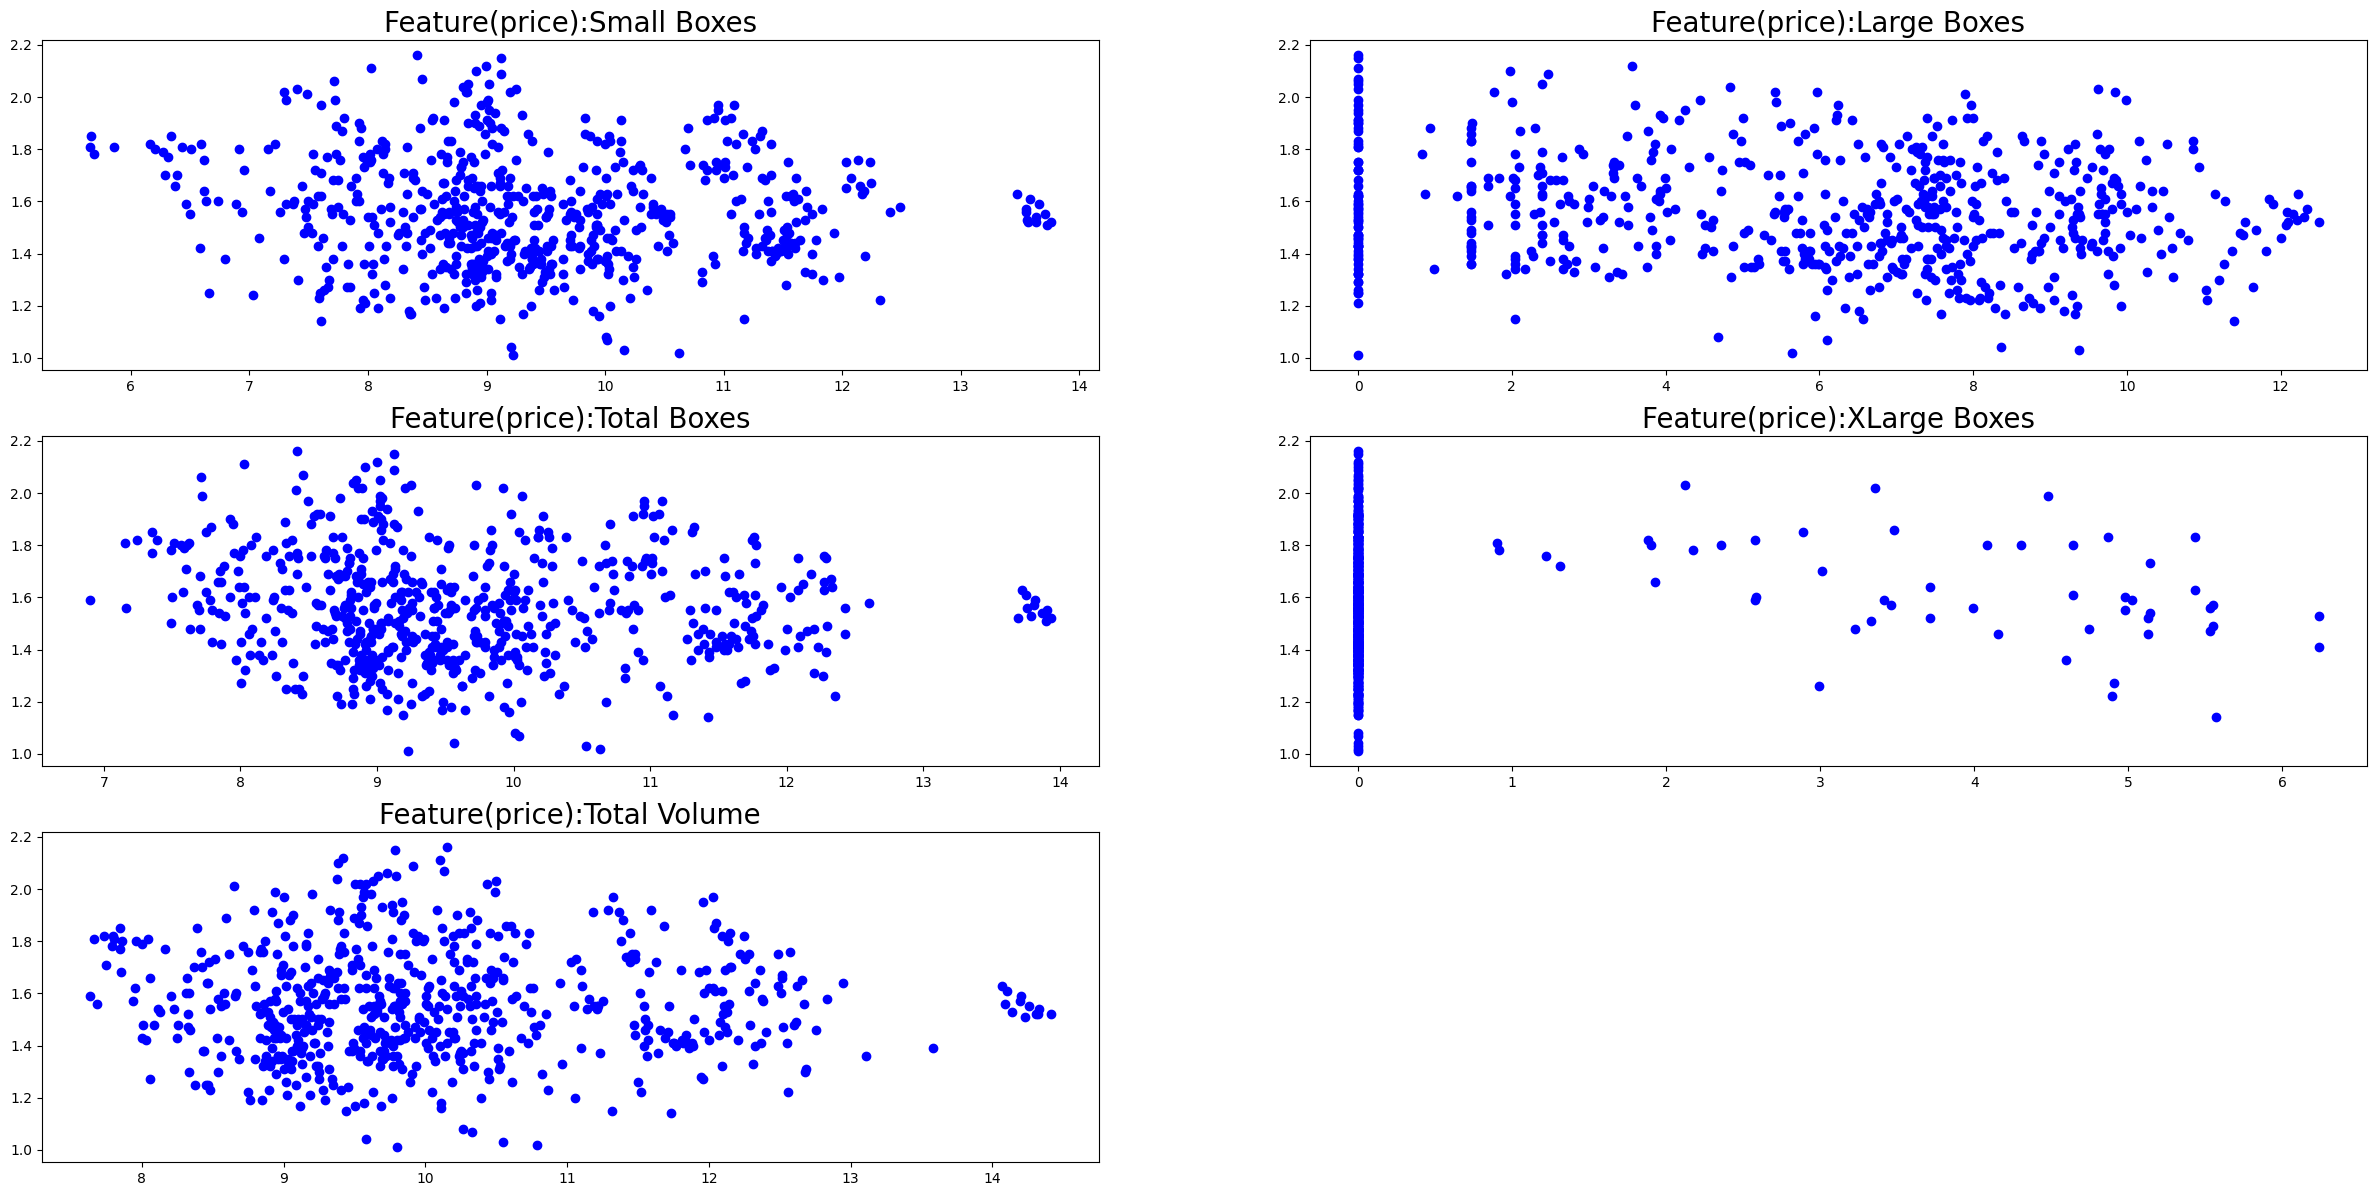

In [25]:
price_correlation_plot(X_log_transformed_df,"price")

Before log transformation

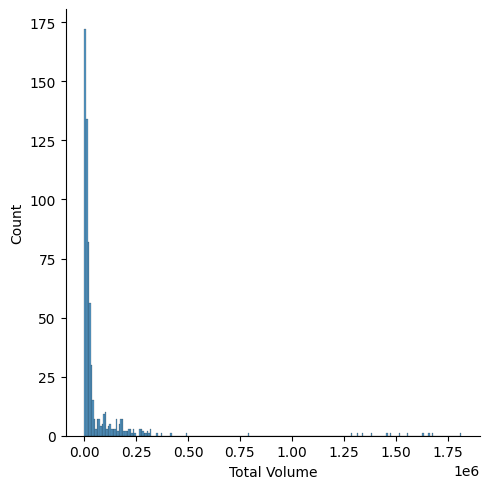

In [26]:
sns.displot(X_filtered['Total Volume'])

After Log Transformation

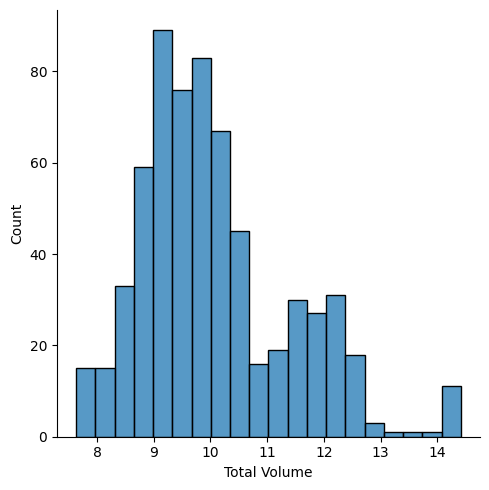

In [27]:
sns.displot(X_log_transformed_df['Total Volume'])

In [28]:
X_scaled=X_filtered.drop(labels=['Total Boxes', "Small Boxes", "Large Boxes", "XLarge Boxes", "Total Volume"],axis=1)
X_scaled = pd.concat([X_scaled, X_log_transformed_df],axis=1)

In [29]:
X_scaled

,Region,Month,Day,Small Boxes,Large Boxes,Total Boxes,XLarge Boxes,Total Volume
323,33,1,7,8.111139,7.573449,8.570963,0.0,8.949230
335,27,1,7,8.784144,3.879913,8.791380,0.0,8.833608
311,33,1,7,12.317937,9.058182,12.355611,0.0,12.555265
299,32,1,7,8.873046,2.663053,8.874914,0.0,8.922264
287,23,1,7,7.708465,7.078232,8.135051,0.0,8.438896
...,...,...,...,...,...,...,...,...
360,28,3,25,10.013687,0.000000,10.013687,0.0,10.025578
24,21,3,25,10.818950,2.806386,10.819261,0.0,10.961407
336,39,3,25,11.161643,4.880071,11.163498,0.0,11.682707
312,33,3,25,8.483837,6.419148,8.603086,0.0,8.888990


In [30]:
# Train, Test Data Split


n_train = int(X_filtered.shape[0]*0.8)
X_train = X_filtered[:n_train]
y_train = y_filtered[:n_train]
X_test  = X_filtered[n_train:]
y_test = y_filtered[n_train:]

scaled_X_train = X_scaled[:n_train]
scaled_X_test  = X_scaled[n_train:]

# 3. Model Training
- Ridge
- Decision tree
- Random Forest
- SVR

In [31]:
# Linear regression model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
model = Ridge(alpha=0.2)
# model = LinearRegression()
model.fit(scaled_X_train, y_train)

Ridge(alpha=0.2)

In [32]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree regression model
tree_model = DecisionTreeRegressor(max_depth=6, random_state=2023)
tree_model.fit(scaled_X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=2023)

In [33]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest regressor model
rf_model = RandomForestRegressor(n_estimators=20, random_state=2023)
rf_model.fit(scaled_X_train, y_train)

<ipython-input-33-b838902f74ff>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(scaled_X_train, y_train)


RandomForestRegressor(n_estimators=20, random_state=2023)

In [34]:
from sklearn.svm import SVR
# SVM model
svm_model = SVR(C=10, kernel='linear')
svm_model.fit(scaled_X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, kernel='linear')

# 4. Model Selection
- KFold Cross Validation
- R squared

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def cross_validation_scores(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, cv=20)
    return {"MIN": scores.min(), "MAX": scores.max(), "MEAN": scores.mean()}


def regression_scores(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R squared":r2}


In [36]:
# Validate Linear regression model
y_pred = model.predict(scaled_X_train)
print("cross validation score", cross_validation_scores(model, scaled_X_train, y_pred))
print("train data", regression_scores(y_train, y_pred))

cross validation score {'MIN': 0.9998993681677977, 'MAX': 0.999966419679996, 'MEAN': 0.9999444633021003}
train data {'MAE': 0.14839528750164022, 'MSE': 0.036228188335379184, 'RMSE': 0.19033703879008726, 'R squared': 0.17649693819086432}


In [37]:
# Validate Decision tree model
tree_y_pred = tree_model.predict(scaled_X_train)
print("cross validation score", cross_validation_scores(tree_model, scaled_X_train, tree_y_pred))
print("train data", regression_scores(y_train, tree_y_pred))

cross validation score {'MIN': 0.3991769662451984, 'MAX': 0.9974747495152616, 'MEAN': 0.7628581375504588}
train data {'MAE': 0.11204060381112893, 'MSE': 0.02181812251445144, 'RMSE': 0.14770958843098655, 'R squared': 0.5040521892166667}


In [38]:
# Validate Random Forest model
rf_y_pred = rf_model.predict(scaled_X_train)
print("cross validation score", cross_validation_scores(rf_model, scaled_X_train, rf_y_pred))
print("train data", regression_scores(y_train, rf_y_pred))

cross validation score {'MIN': 0.5328260710997872, 'MAX': 0.8305562880764453, 'MEAN': 0.7227182215826662}
train data {'MAE': 0.0391611328125, 'MSE': 0.003220482910156249, 'RMSE': 0.05674929876356402, 'R squared': 0.9267951929457168}


In [39]:
# Validate SVM model
svm_y_pred = svm_model.predict(scaled_X_train)
print("cross validation score", cross_validation_scores(svm_model, scaled_X_train, svm_y_pred))
print("train data", regression_scores(y_train, svm_y_pred))

cross validation score {'MIN': 0.5633649138832401, 'MAX': 0.9390824501757997, 'MEAN': 0.8279800118481819}
train data {'MAE': 0.14439951708886611, 'MSE': 0.03788293900026962, 'RMSE': 0.1946354001723983, 'R squared': 0.13888279567694728}


With **stable and high cross validation score** and **high R squared score**, I chose **Random Forest** model.



# 5. Model Evaluation

**Random Forest** model shows the **best** evaluation scores under the test dataset.

In [40]:
# Evaluate Linear regression model
y_pred = model.predict(scaled_X_test)
print("test data", regression_scores(y_test, y_pred))

test data {'MAE': 0.14527650756629243, 'MSE': 0.03405077980790544, 'RMSE': 0.18452853385833162, 'R squared': 0.25734395184502856}


In [41]:
# Evaluate Decision tree model

tree_y_pred = tree_model.predict(scaled_X_test)
print("test data", regression_scores(y_test, tree_y_pred))

test data {'MAE': 0.1443181345280811, 'MSE': 0.034329452840213374, 'RMSE': 0.18528208990675105, 'R squared': 0.2512660231142122}


In [42]:
# Evaluate Random Forest model

rf_y_pred = rf_model.predict(scaled_X_test)
print("test data", regression_scores(y_test, rf_y_pred))

test data {'MAE': 0.11271484375000002, 'MSE': 0.022719119140625004, 'RMSE': 0.15072862747542354, 'R squared': 0.5044903131815703}


In [43]:
# Evaluate SVM model
svm_y_pred = svm_model.predict(scaled_X_test)
print("test data", regression_scores(y_test, svm_y_pred))

test data {'MAE': 0.1376591957870231, 'MSE': 0.03236100302242323, 'RMSE': 0.17989164244740008, 'R squared': 0.29419840736263403}


# 6. Model Visualization

## Linear Regression Model

In [44]:
print(X_scaled.columns)
model.coef_
# Total volume > XLarge Boxes > Day > Small Boxes > Region

Index(['Region', 'Month', 'Day', 'Small Boxes', 'Large Boxes', 'Total Boxes',
       'XLarge Boxes', 'Total Volume'],
      dtype='object')


array([[ 0.00085246, -0.01362975,  0.00240232,  0.00156413, -0.00307659,
        -0.22272321,  0.01485993,  0.21321213]])

In [56]:
def model_plot(data, target_name_list, target):
  target_name = 'Kimchi Order'
  plt.figure(figsize=(20,8))
  for idx, col_name in enumerate(target_name_list):
    plt.subplot(1,4,idx+1)
    # plt.scatter(data[col_name][:n_train], y_filtered[:n_train], color='blue', label='Train Data',marker = '.')
    # plt.scatter(data[col_name][:n_train], target[:n_train], label="Train Prediction", color="red",marker = '.')
    plt.scatter(data[col_name][n_train:], y_filtered[n_train:], color='blue', label='Test Data', marker = 'o')
    plt.scatter(data[col_name][n_train:], target[n_train:], label="Test Prediction", color="red",marker = 'o')
    plt.legend()
    plt.title("Feature" + "(" + target_name + "):" + col_name, fontsize = 20)
  plt.tight_layout()
  plt.show()


Comparing Actual data to Model prediction for top 4 powerful components

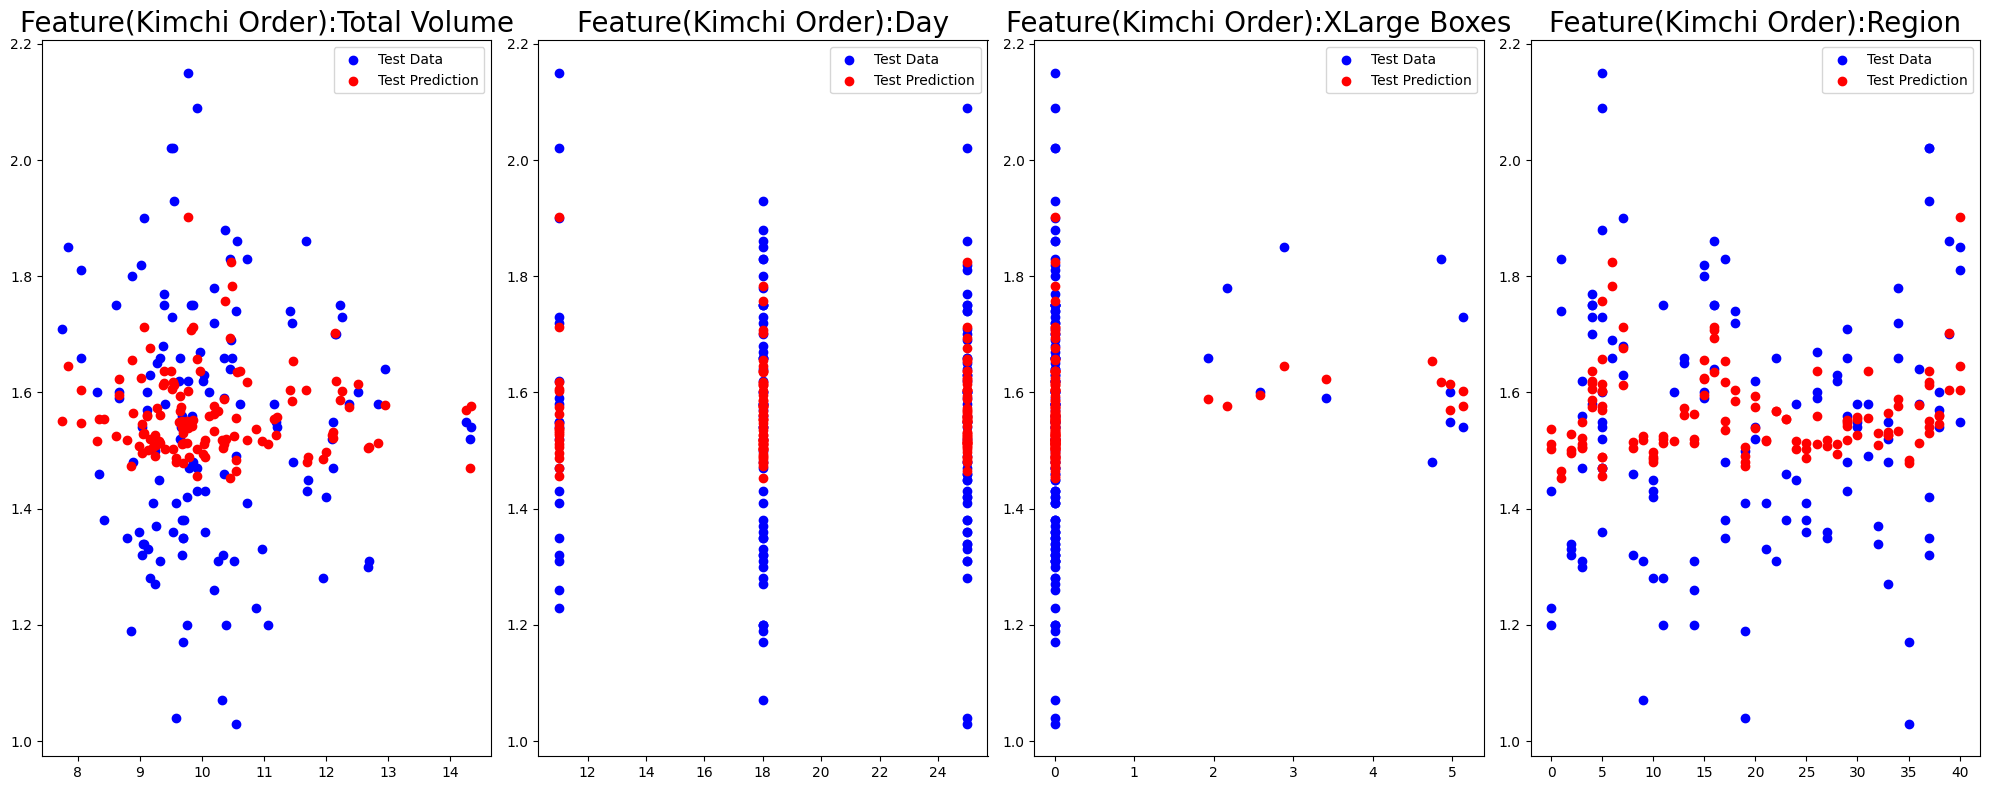

In [57]:
y_total_pred = model.predict(X_scaled)
model_plot(X_scaled, ['Total Volume', 'Day','XLarge Boxes', 'Region'],y_total_pred)

## Decision Tree Model

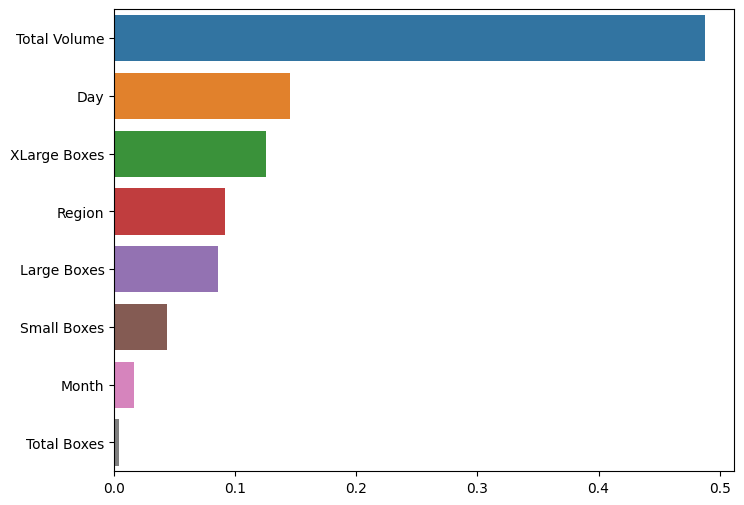

In [47]:
# variable importance

ftr_importances_values = tree_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

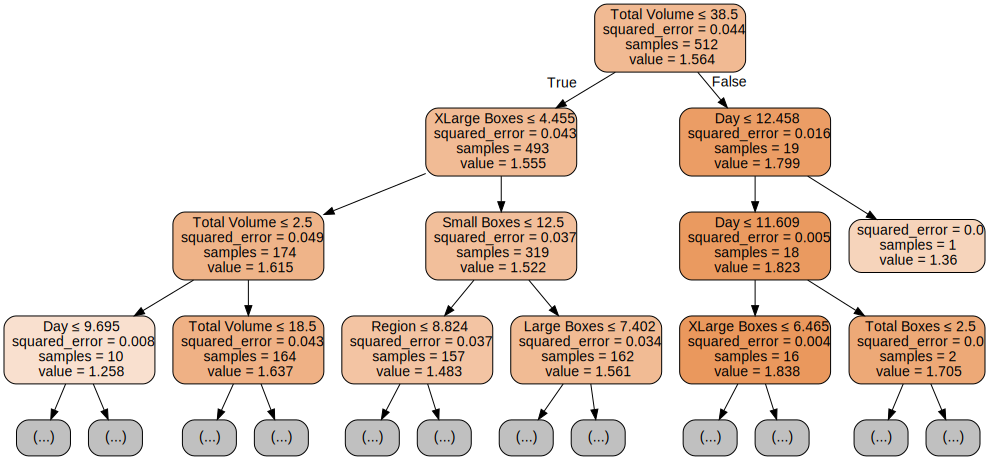

In [48]:
from sklearn.tree import export_graphviz
import graphviz

# Export as dot file
dot_data = export_graphviz(tree_model, out_file=None,feature_names = X_filtered.columns,max_depth=3,
                           filled=True, rounded=True,
                           special_characters=True)

# Visualize using graphviz
graph = graphviz.Source(dot_data)
graph

Comparing Actual data to Model prediction for top 4 powerful components

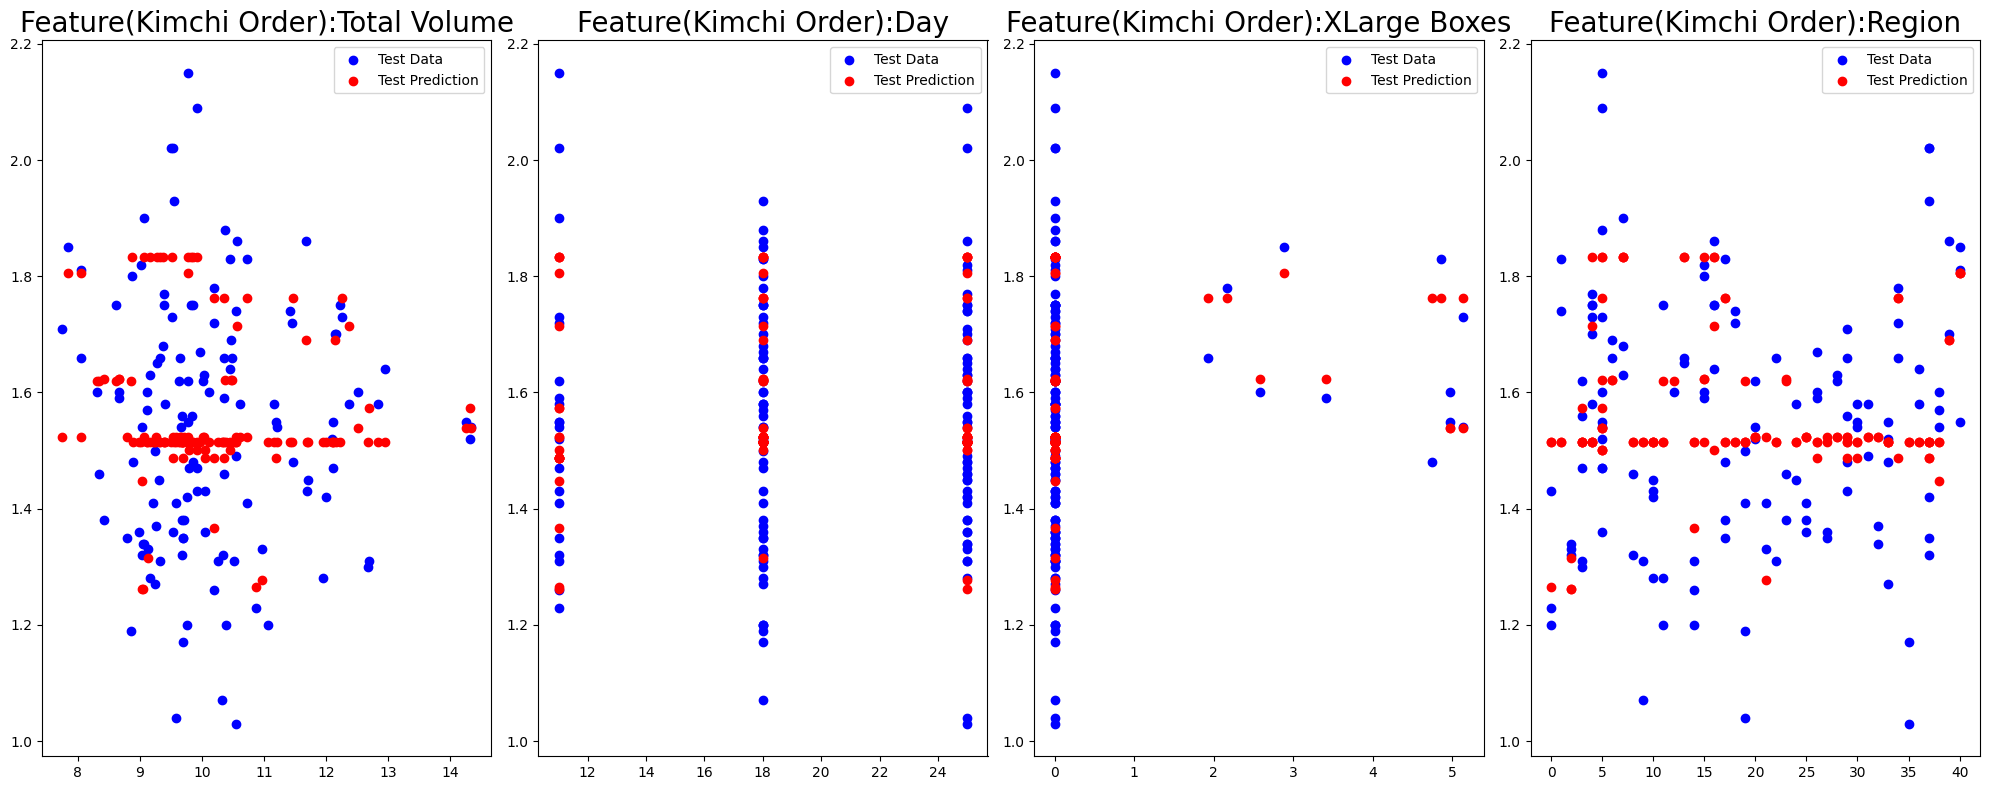

In [58]:
y_total_pred = tree_model.predict(X_scaled)
model_plot(X_scaled, ['Total Volume', 'Day','XLarge Boxes', 'Region'],y_total_pred)

## Random Forest Model

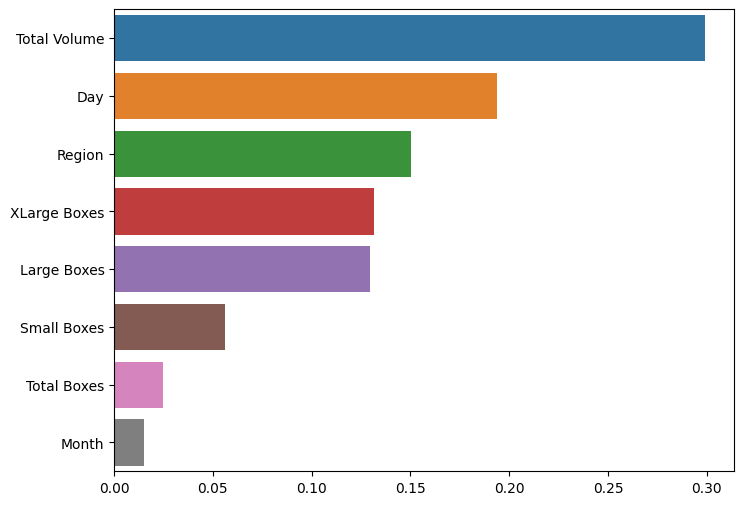

In [50]:
# variable importance

ftr_importances_values = rf_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()


number of trees:  20


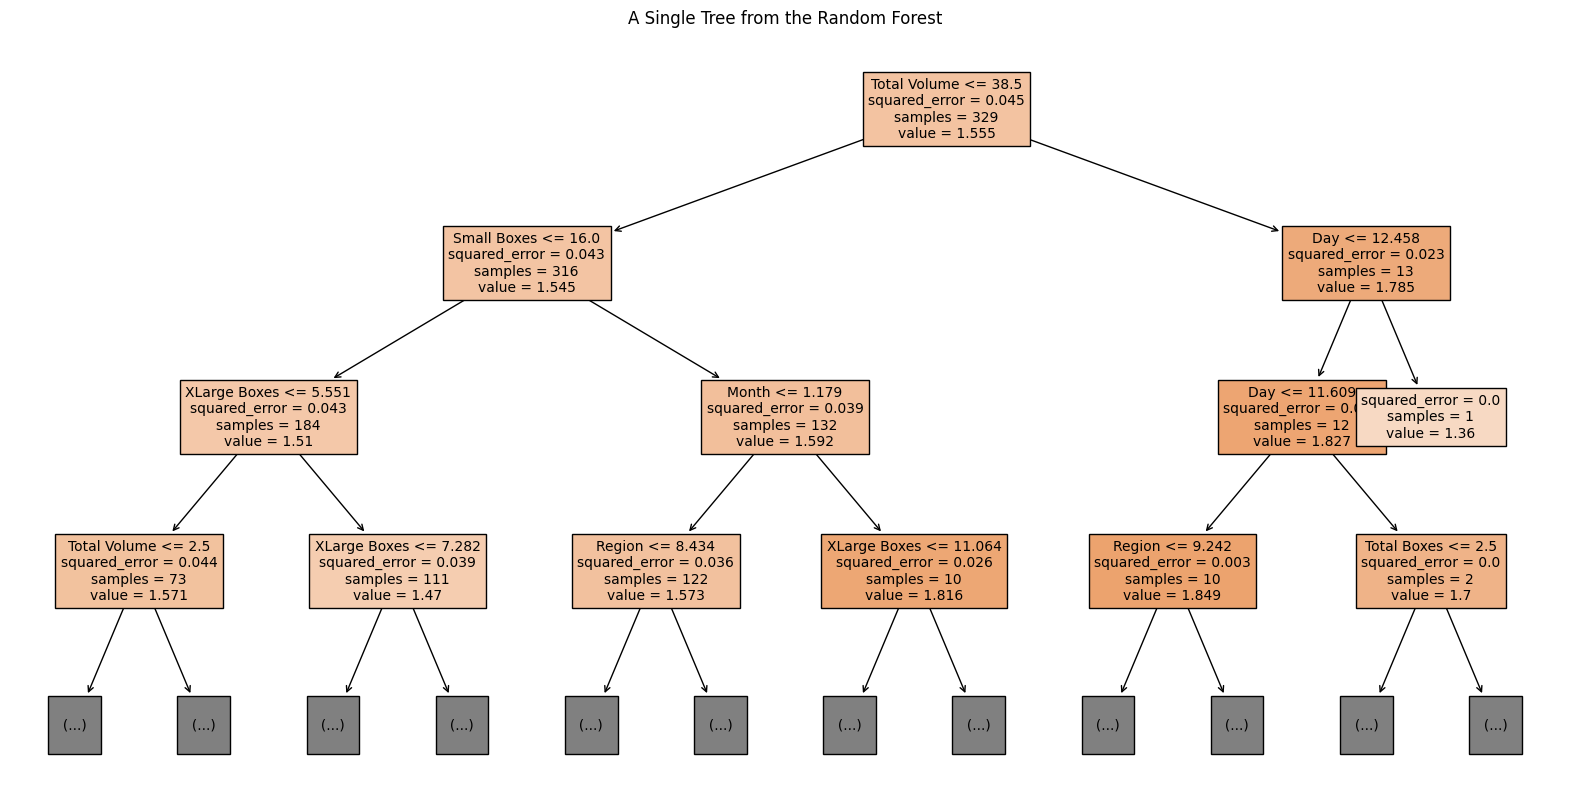

In [51]:
from sklearn.tree import plot_tree

# Select one tree from the forest
print("number of trees: ", len(rf_model.estimators_))
selected_tree = rf_model.estimators_[0]

# Plot the selected tree
plt.figure(figsize=(20, 10))
plot_tree(selected_tree, filled=True, feature_names=X_filtered.columns, max_depth=3, fontsize=10)
plt.title("A Single Tree from the Random Forest")
plt.show()

Comparing Actual data to Model prediction for top 4 powerful components

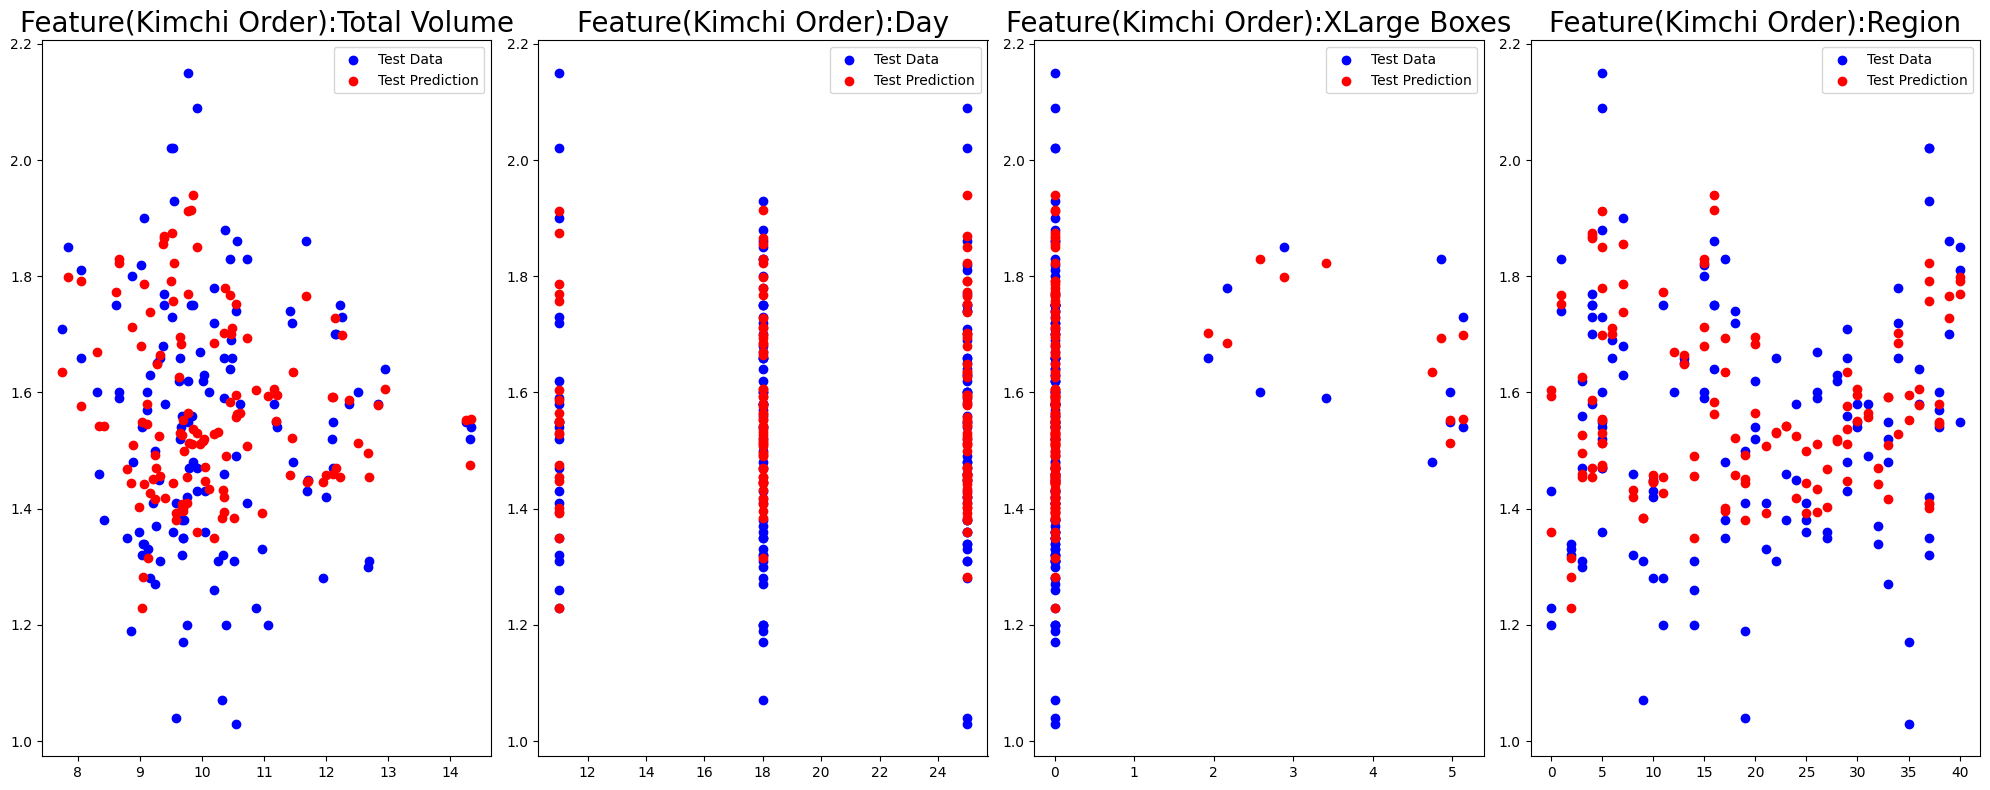

In [59]:
y_total_pred = rf_model.predict(X_scaled)
model_plot(X_scaled, ['Total Volume', 'Day','XLarge Boxes', 'Region'],y_total_pred)

## SVM

In [53]:
print(X_scaled.columns)
svm_model.coef_
# Total Volume > XLarge Boxes > Region

Index(['Region', 'Month', 'Day', 'Small Boxes', 'Large Boxes', 'Total Boxes',
       'XLarge Boxes', 'Total Volume'],
      dtype='object')


array([[ 0.00229916, -0.03024119,  0.00095286, -0.0121859 , -0.00397306,
        -0.30463826,  0.01728318,  0.31356835]])

Comparing Actual data to Model prediction for top 4 powerful components

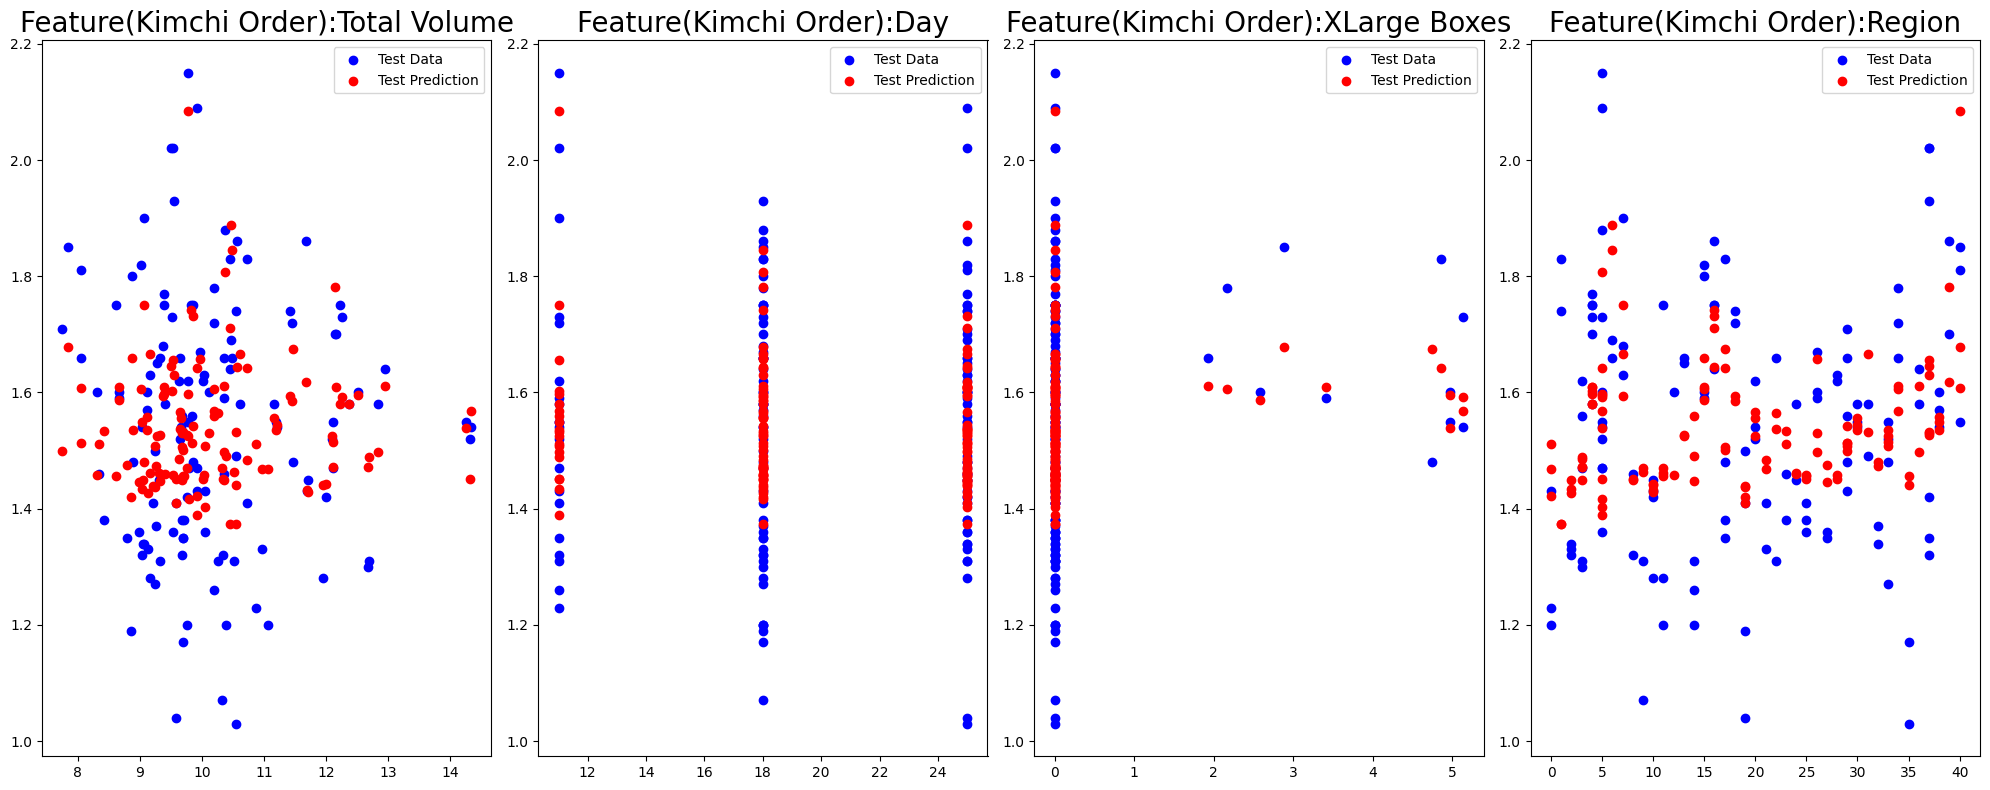

In [60]:
y_total_pred = svm_model.predict(X_scaled)
model_plot(X_scaled, ['Total Volume', 'Day','XLarge Boxes', 'Region'],y_total_pred)